In [29]:
import isee_engine.nwb as nwb
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib notebook
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


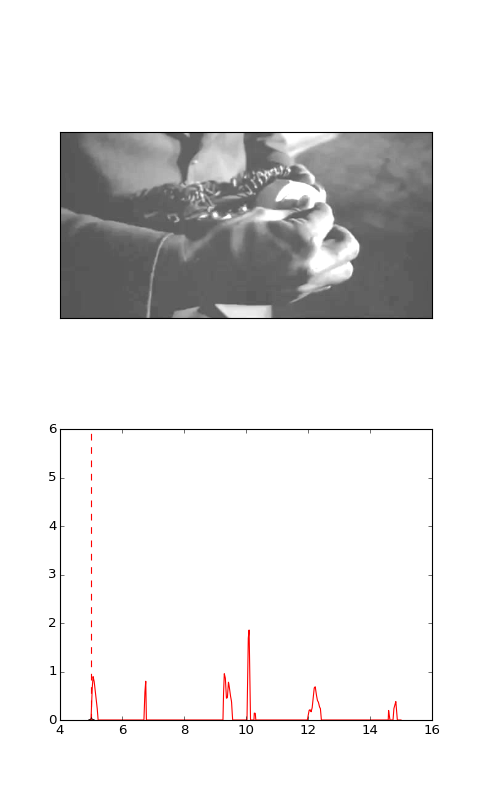

In [30]:
fig = plt.figure(figsize=(6,10))
gs1 = gridspec.GridSpec(2, 1)
movie_ax = fig.add_subplot(gs1[0])
fr_ax = fig.add_subplot(gs1[1])

f = nwb.open_file('/data/mat/iSee_temp_shared/external_inputs/lgn_watching_touch_of_evil_example.hdf5')
my_movie_widget = nwb.GrayScaleMovie.get_stimulus(f, 0).get_widget(ax=movie_ax)
my_plot_widget_list =[firing_rate_obj.get_widget(ax=fr_ax) for firing_rate_obj in nwb.FiringRate.get_acquisition(f)]
# my_plot_widget = nwb.FiringRate.get_acquisition(f, 0).get_widget(ax=fr_ax)
f.close()

def initialize(t0, ii_to_plot):

    my_movie_widget.initialize(t0)
#     my_plot_widget.initialize(t0)
    for ii, x in enumerate(my_plot_widget_list): 
        x.initialize(t0)
        if ii == ii_to_plot:
            x.set_visible(True)
        else:
            x.set_visible(False)
                
    
initialize(5.,0)
plt.show()

In [32]:
@interact()
def update(t=widgets.FloatSlider(min=5,max=15,step=.1,value=1),
           ii=widgets.IntSlider(min=0,max=len(my_plot_widget_list)-1,value=0)):
    my_movie_widget.update(t)
#     my_plot_widget.update(t)
    print ii
    for ii_iter, x in enumerate(my_plot_widget_list):    
        
        if ii == ii_iter:
            x.set_visible(True)
            x.update(t)
        else:
            x.set_visible(False)

0
